# Model Testing


## Setup


In [2]:
from scripts.data_loader import load_data, split_features_targets
from scripts.preprocessing import preprocess_data, derive_features
from scripts.model_testing import test_independant_models, display_importances, find_top_models

from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    ExtraTreesRegressor,
)
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [3]:
df = load_data("data")
df = preprocess_data(df)
df = derive_features(df)

features, targets = split_features_targets(df)

# Target-Independant Testing


### Models


In [4]:
models = [
    RandomForestRegressor(n_estimators=100, max_depth=10, n_jobs=-1),
    GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1),
    ExtraTreesRegressor(n_estimators=100, max_depth=10, n_jobs=-1),
    BaggingRegressor(n_estimators=10, max_samples=0.5, n_jobs=-1),
    XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, n_jobs=-1),
    LGBMRegressor(
        n_estimators=100, max_depth=5, learning_rate=0.1, n_jobs=-1, verbose=-1
    ),
]

### Results


In [ ]:
# Ice Thickness
find_top_models(test_independant_models(models, features, targets["ice_thickness"])).head()

                                  MSE       MAE        R2
ExtraTreesRegressor        567.113246  5.570909  0.429895
RandomForestRegressor      573.539791  4.788432  0.423434
LGBMRegressor              575.475945  5.697298  0.421488
XGBRegressor               588.535506  5.595283  0.408359
BaggingRegressor           594.532047  4.003519  0.402331
GradientBoostingRegressor  597.949949  5.950361  0.398895

Feature Importances for RandomForestRegressor:
Importance Measure: None
air_temperature_rolling_std    0.146152
precipitation_rolling_std      0.140229
distance_to_pole               0.112360
precipitation                  0.108228
y                              0.104776
ocean_temperature              0.091116
x                              0.084546
air_temperature                0.077017
log_air_temperature            0.069881
coastline                      0.045444
Name: Feature Importance, dtype: float64


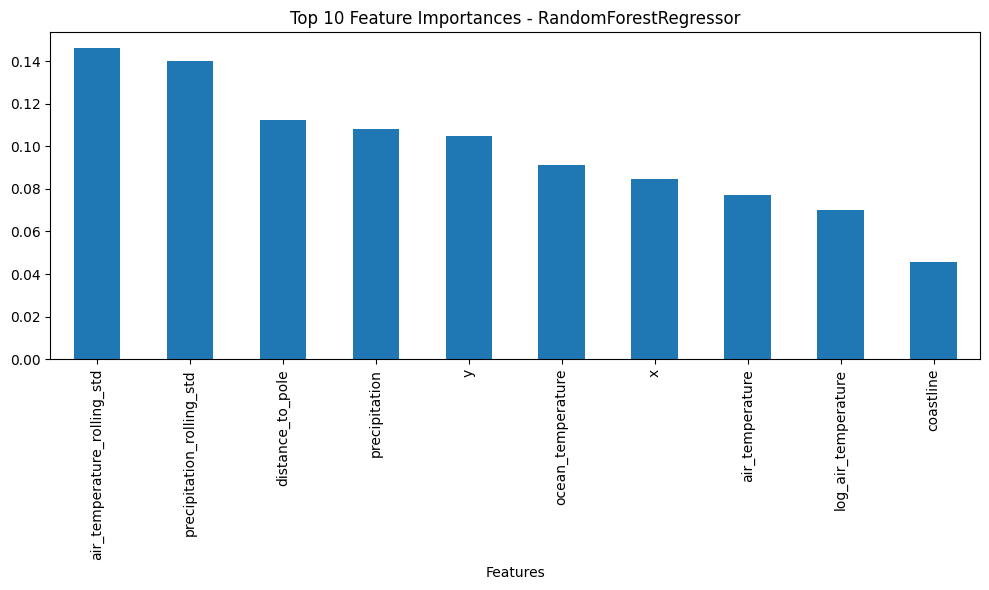


Feature Importances for GradientBoostingRegressor:
Importance Measure: None
precipitation_rolling_std      0.127740
y                              0.127342
precipitation                  0.123169
air_temperature_rolling_std    0.121743
x                              0.107125
distance_to_pole               0.099854
ocean_temperature              0.092668
air_temperature                0.070823
log_air_temperature            0.066895
coastline                      0.052594
Name: Feature Importance, dtype: float64


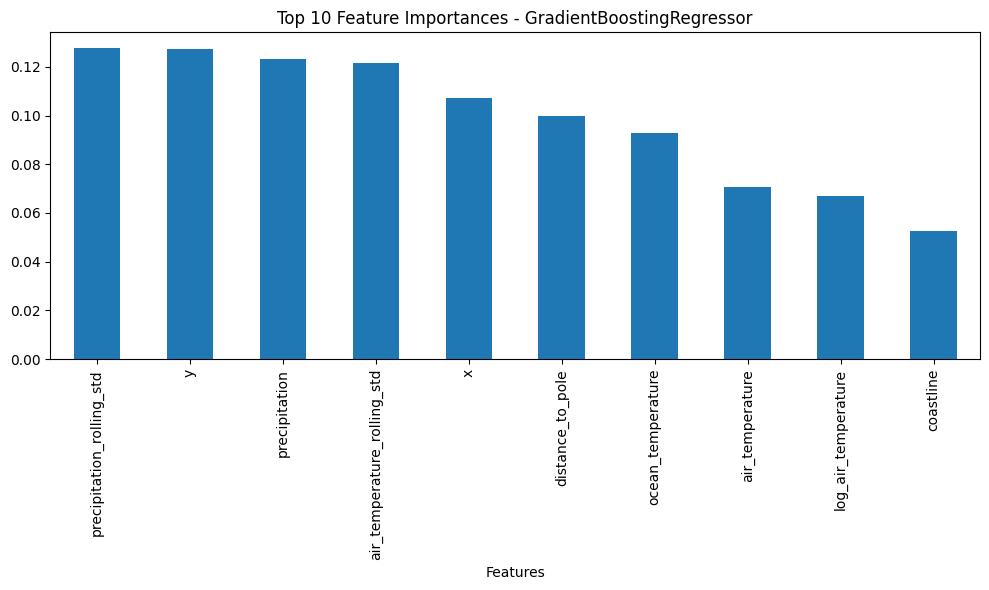


Feature Importances for ExtraTreesRegressor:
Importance Measure: None
y                              0.134466
air_temperature_rolling_std    0.128547
x                              0.123210
distance_to_pole               0.108246
air_temperature                0.094325
precipitation_rolling_std      0.087235
log_air_temperature            0.084742
ocean_temperature              0.073055
precipitation                  0.071115
coastline                      0.063649
Name: Feature Importance, dtype: float64


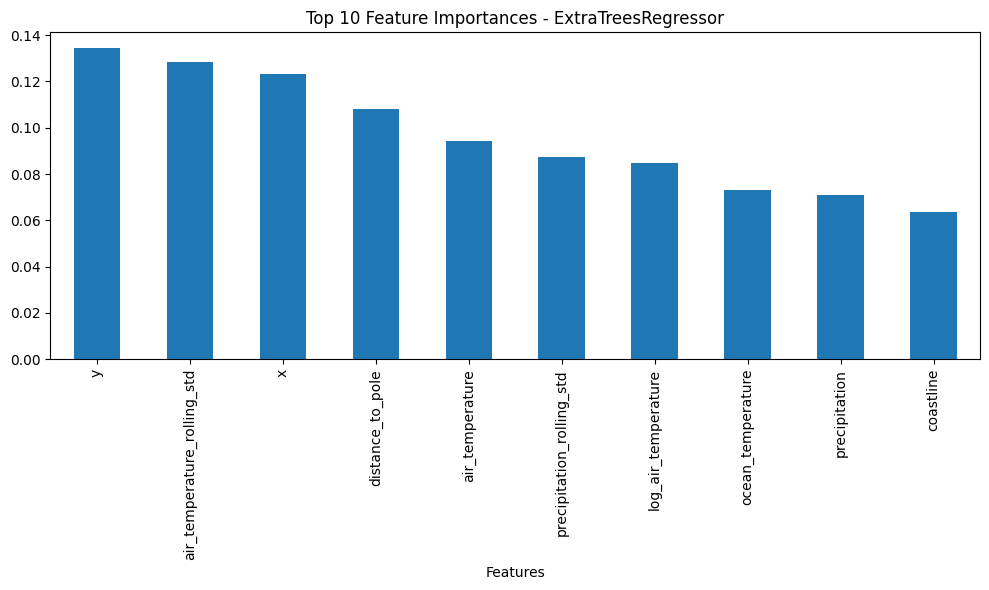


Feature Importances for BaggingRegressor:
Importance Measure: None
x                              0.179752
y                              0.133799
precipitation                  0.116824
air_temperature                0.104437
ocean_temperature              0.096570
year                           0.085828
distance_to_pole               0.077017
precipitation_rolling_std      0.070208
air_temperature_rolling_std    0.058699
log_air_temperature            0.046054
Name: Mean Feature Importance, dtype: float64


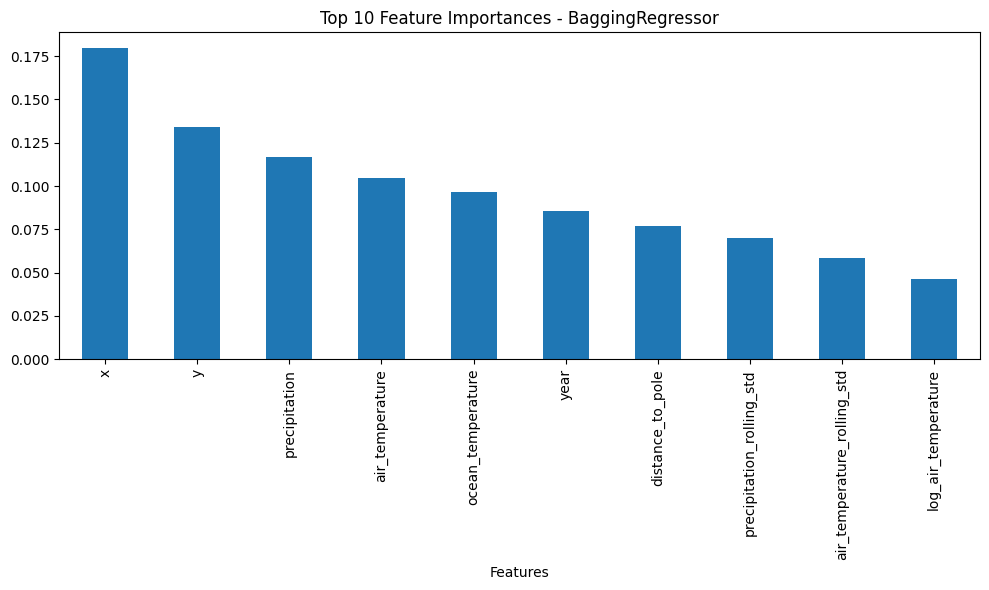


Feature Importances for XGBRegressor:
Importance Measure: None
coastline                      0.145730
precipitation_rolling_std      0.127599
ocean_temperature              0.107141
precipitation                  0.101084
x                              0.097870
y                              0.094507
air_temperature                0.089318
year                           0.084332
air_temperature_rolling_std    0.078579
distance_to_pole               0.073838
Name: Feature Importance, dtype: float32


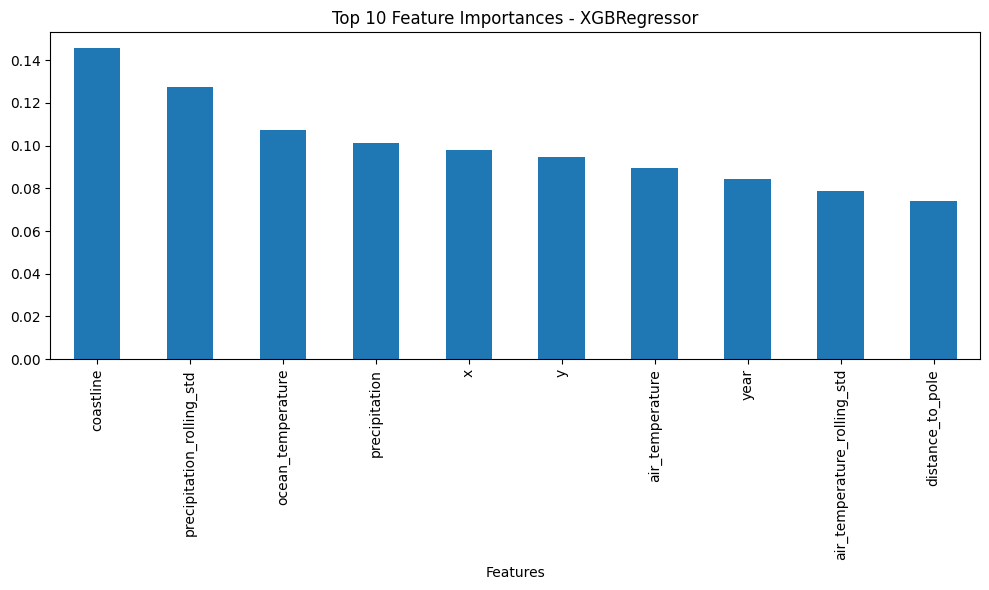


Feature Importances for LGBMRegressor:
Importance Measure: None
air_temperature                370
y                              353
x                              350
distance_to_pole               340
air_temperature_rolling_std    304
precipitation_rolling_std      284
ocean_temperature              272
precipitation                  215
coastline                       96
year                            94
Name: Feature Importance, dtype: int32


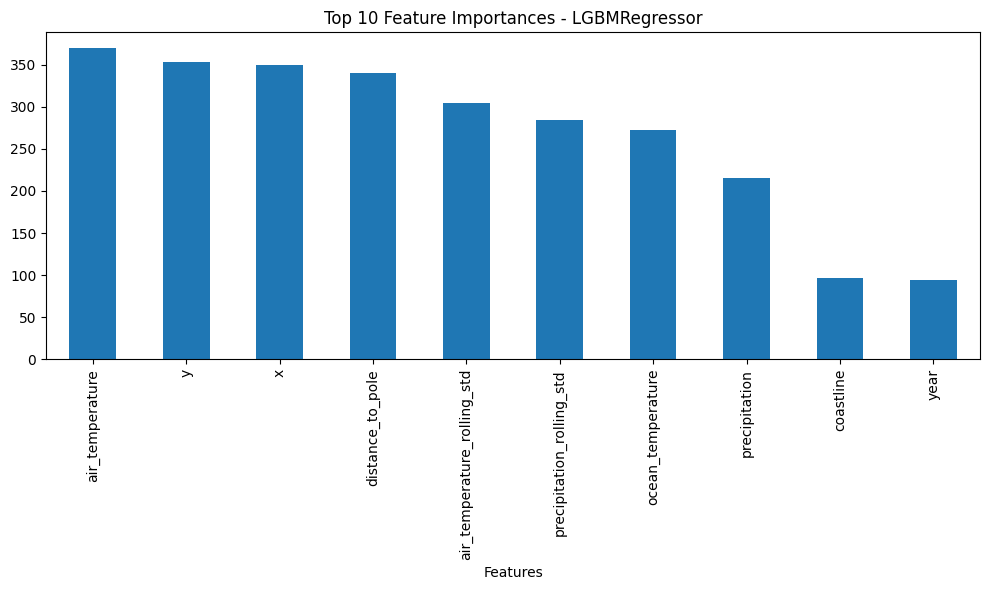

In [5]:
# Ice Velocity
results_tuple = test_independant_models(models, features, targets["ice_velocity"])
top_models = find_top_models(results_tuple)
print(top_models)

# If you want to display feature importances
results, feature_importances = results_tuple
display_importances(feature_importances)

In [ ]:
# Ice Mask
find_top_models(test_independant_models(models, features, targets["ice_mask"])).head()

## Further Testing


### Models


In [ ]:
MAX_DEPTH = 60
N_ESTIMATORS = 160
N_JOBS = -1

models = [
    RandomForestRegressor(n_estimators=N_ESTIMATORS, max_depth=MAX_DEPTH, n_jobs=N_JOBS),
    GradientBoostingRegressor(n_estimators=N_ESTIMATORS, max_depth=MAX_DEPTH, learning_rate=0.1),
    ExtraTreesRegressor(n_estimators=N_ESTIMATORS, max_depth=MAX_DEPTH, n_jobs=N_JOBS),
    BaggingRegressor(n_estimators=N_ESTIMATORS, max_samples=0.5, n_jobs=N_JOBS),
    XGBRegressor(n_estimators=N_ESTIMATORS, max_depth=MAX_DEPTH, learning_rate=0.1, n_jobs=N_JOBS),
    LGBMRegressor(
        n_estimators=N_ESTIMATORS, max_depth=MAX_DEPTH, learning_rate=0.1, n_jobs=N_JOBS, verbose=-1
    ),
]

### Results


In [ ]:
results = test_independant_models(models, features, targets["ice_velocity"], split_year=2085)
results.head(6)